In [1]:
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
sns.set(color_codes=True)

%matplotlib inline

In [275]:
# ilk terimin covarianci hep 1 cikar -2 - -2

In [298]:
x = np.array([-2, -1, 0, 3.5, 4,]);
y = np.array([4.1, 0.9, 2, 12.3, 15.8])

N = len(x)
m = np.zeros((N))
print(x)
print(y)
print(m)

[-2.  -1.   0.   3.5  4. ]
[  4.1   0.9   2.   12.3  15.8]
[ 0.  0.  0.  0.  0.]


In [13]:
sigma = np.cov(x, y)
print(sigma)

[[  7.3    16.39 ]
 [ 16.39   44.037]]


In [280]:
def cov(x1, x2):
    return np.exp(-1.0/2 * np.power(x1 - x2, 2))

In [299]:
K = np.zeros((N, N))
print(K)
for i in range(N):
    for j in range(i, N):
        K[i][j] = cov(x[i], x[j])
        K[j][i] = K[i][j]
print(K)

[[ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]]
[[  1.00000000e+00   6.06530660e-01   1.35335283e-01   2.69957850e-07
    1.52299797e-08]
 [  6.06530660e-01   1.00000000e+00   6.06530660e-01   4.00652974e-05
    3.72665317e-06]
 [  1.35335283e-01   6.06530660e-01   1.00000000e+00   2.18749112e-03
    3.35462628e-04]
 [  2.69957850e-07   4.00652974e-05   2.18749112e-03   1.00000000e+00
    8.82496903e-01]
 [  1.52299797e-08   3.72665317e-06   3.35462628e-04   8.82496903e-01
    1.00000000e+00]]


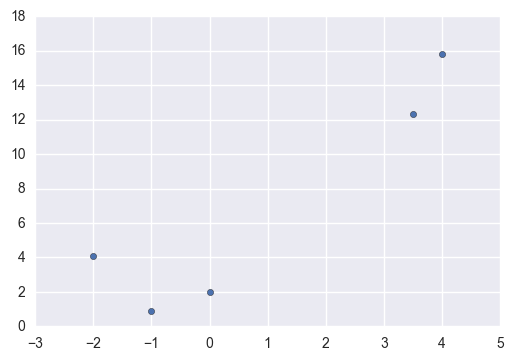

In [159]:
plt.scatter(x, y)

In [286]:
cov(4, 4) # expected to be 1

1.0

In [297]:
def pred(xp):
    K2 = np.zeros((N+1, N+1))
    N2 = N + 1
    
    sigma22 = cov(xp, xp)
    K2[N2-1][N2-1] = sigma22
    
    for i in range(N):
        for j in range(i, N):
            K2[i][j] = cov(x[i], y[j])
            K2[j][i] = K2[i][j]
    
    for i in range(N):
        K2[N2-1][i]= cov(xp, x[i])
        K2[i][N2-1]= cov(xp, x[i])

    sigma12 = np.array(K2[:N2-1,N2-1])
    sigma11 = np.mat(K)
    sigma21 = K[N-1:]
    print(sigma12)
    mp = (sigma12.T * sigma11.I) * np.mat(y).T
#     sigmap = sigma22 - np.mat(sigma12).T * sigma11.I * np.mat(sigma12)
#     return mp, sigmap
    return mp, sigma22

pred(4)

[  1.52299797e-08   3.72665317e-06   3.35462628e-04   8.82496903e-01
   1.00000000e+00]


(matrix([[ 15.8]]), 1.0)

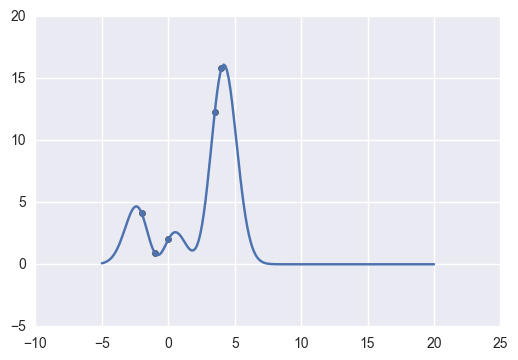

In [285]:
plt.scatter(x, y)
def p():
    x = np.linspace(-5, 20, 200)
    y = np.zeros(200)
    yu = np.zeros(200)
    yb = np.zeros(200)
    for i in range(len(x)):
        yp, sigmap = pred(x[i])
        
        yp = np.asarray(yp)[0][0]
        yu[i] = yp - np.sqrt(sigmap)
        y[i] = yp
#     plt.plot(x, yu)
    plt.plot(x, y)
p()

In [135]:
np.asarray(np.mat([[  9.11765304e+27]]))[0][0]

9.1176530400000005e+27

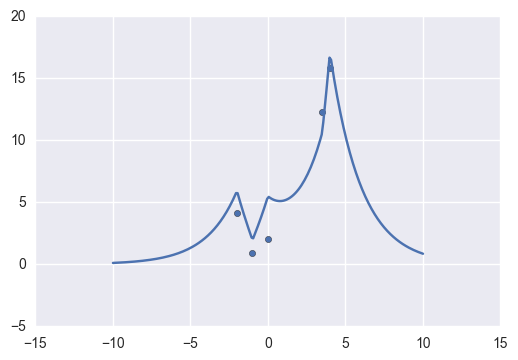

In [238]:
def cov(x1, x2):
    return np.exp(-1.0/2 * np.abs(x1 - x2))

def pred(xp):
    K2 = np.zeros((N+1, N+1))
    N2 = N + 1
    
    sigma22 = cov(xp, xp)
    K2[N2-1][N2-1] = sigma22
    
    for i in range(N):
        for j in range(i, N):
            K2[i][j] = cov(x[i], y[j])
            K2[j][i] = K2[i][j]
    
    for i in range(N):
        K2[N2-1][i]= cov(xp, x[i])
        K2[i][N2-1]= cov(xp, x[i])
    
    sigma12 = np.array(K2[:N2-1,N2-1])
    sigma11 = np.mat(K)
    sigma21 = K[N-1:]
#     print(sigma12)
#     print(sigma11)
    mp = (sigma12.T * sigma11.I) * np.mat(y).T
#     sigmap = sigma11 - np.mat(sigma12) * sigma21.T
    return mp, sigma22

plt.scatter(x, y)
def p():
    x = np.linspace(-10, 10, 200)
    y = np.zeros(200)
    yu = np.zeros(200)
    yb = np.zeros(200)
    for i in range(len(x)):
        yp, sigmap = pred(x[i])
        
        yp = np.asarray(yp)[0][0]
        yu[i] = yp - np.sqrt(sigmap) * 3
        y[i] = yp
#     plt.plot(x, yu)
    plt.plot(x, y)
p()

In [189]:
K

array([[  1.00000000e+00,   6.06530660e-01,   1.35335283e-01,
          2.69957850e-07,   1.52299797e-08],
       [  6.06530660e-01,   1.00000000e+00,   6.06530660e-01,
          4.00652974e-05,   3.72665317e-06],
       [  1.35335283e-01,   6.06530660e-01,   1.00000000e+00,
          2.18749112e-03,   3.35462628e-04],
       [  2.69957850e-07,   4.00652974e-05,   2.18749112e-03,
          1.00000000e+00,   8.82496903e-01],
       [  1.52299797e-08,   3.72665317e-06,   3.35462628e-04,
          8.82496903e-01,   1.00000000e+00]])

In [209]:
K[N-1:]

array([[  1.52299797e-08,   3.72665317e-06,   3.35462628e-04,
          8.82496903e-01,   1.00000000e+00]])